In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from analize.normalized_test import crossover
from Altcoin.altcoin.getData import getData
from Altcoin.altcoin.getBitfinexCandles import updateAll
import statsmodels.api as sm
%matplotlib inline

In [2]:
top_twenty5 = ['BCHUSD', 'BTCUSD', 'BTGUSD', 'DSHUSD', 'EOSUSD', 'ETCUSD',
               'ETHUSD', 'IOTUSD', 'LTCUSD', 'NEOUSD', 'OMGUSD', 'QSHUSD',
               'QTMUSD', 'TRXUSD', 'XMRUSD', 'XRPUSD', 'ZECUSD', 'GNTUSD',
               'SANUSD', 'SPKUSD']
sma = [1, 1, 2, 2, 3, 3, 4, 5, 5, 6, 6, 7, 7, 8, 9, 9, 10, 10, 11, 11, 12, 13, 13, 14, 14, 15, 15, 16]
bma = [2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 17, 19, 20, 22, 24, 25, 27, 28, 30, 31, 33, 35, 36, 38, 39, 41, 42, 44]

In [12]:
# updateAll()
delta = '1D'

In [13]:
btc = getData('BTC', delta).loc['2017-08-01':]
eos = getData('EOS', delta).loc['2017-08-01':]
eth = getData('ETH', delta).loc['2017-08-01':]
iot = getData('IOT', delta).loc['2017-08-01':]
neo = getData('NEO', delta).loc['2017-08-01':]
omg = getData('OMG', delta).loc['2017-08-01':]
xrp = getData('XRP', delta).loc['2017-08-01':]

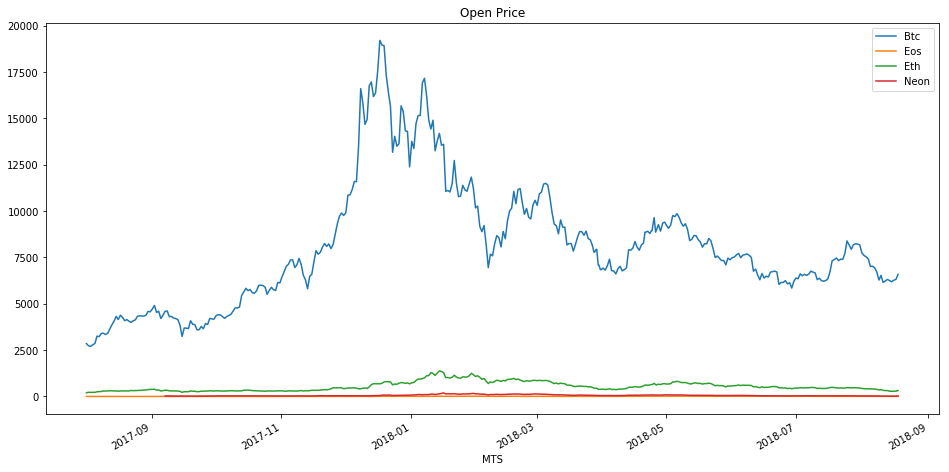

In [14]:
btc['open'].plot(figsize=(16,8),title='Open Price',label='Btc')
eos['open'].plot(label='Eos')
eth['open'].plot(label='Eth')
neo['open'].plot(label='Neon')
plt.legend()

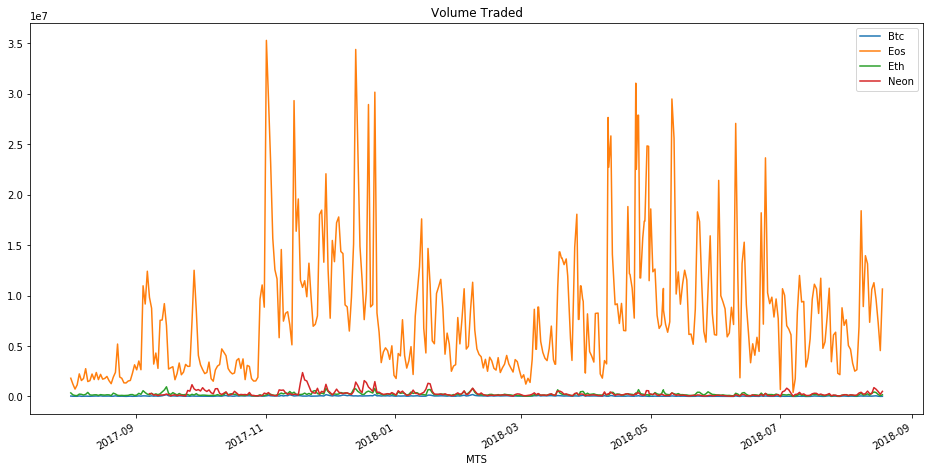

In [15]:
btc['volume'].plot(figsize=(16,8),title='Volume Traded',label='Btc')
eos['volume'].plot(label='Eos')
eth['volume'].plot(label='Eth')
neo['volume'].plot(label='Neon')
plt.legend()

In [16]:
eos['volume'].idxmax()

Timestamp('2017-11-01 07:00:00')

In [17]:
btc['Total Traded'] = btc['open']*btc['volume']
eos['Total Traded'] = btc['open']*btc['volume']
eth['Total Traded'] = btc['open']*btc['volume']
neo['Total Traded'] = btc['open']*btc['volume']
xrp['Total Traded'] = xrp['open']*xrp['volume']

Text(0,0.5,'Total Traded')

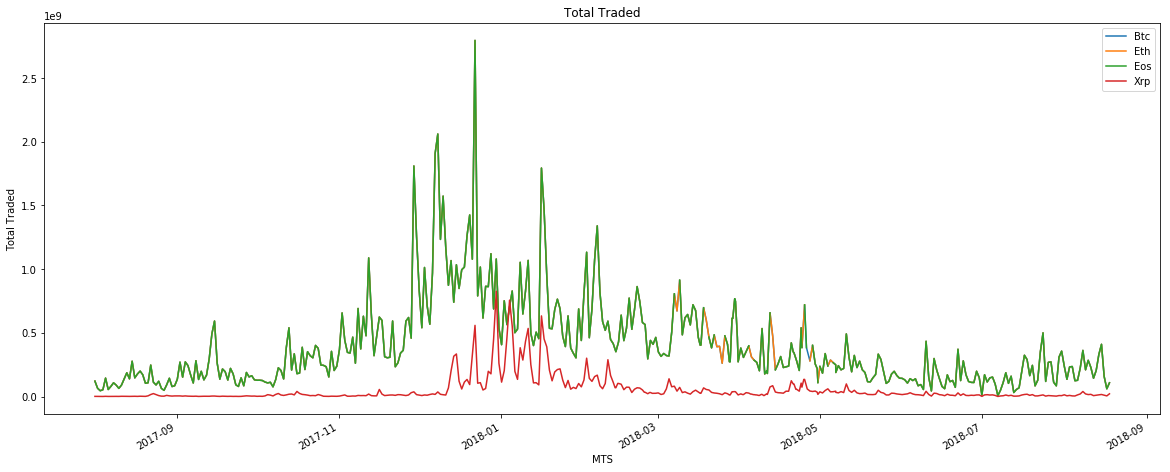

In [20]:
btc['Total Traded'].plot(figsize=(20,8), title='Total Traded', label='Btc')
eth['Total Traded'].plot(label='Eth')
eos['Total Traded'].plot(label='Eos')
xrp['Total Traded'].plot(label='Xrp')
plt.legend()
plt.ylabel('Total Traded')

In [19]:
xrp.head()

,open,close,high,low,volume,Total Traded
MTS,,,,,,
2017-08-01 07:00:00,0.16450,0.17733,0.18496,0.15860,7.380861e+06,1.214152e+06
2017-08-02 07:00:00,0.17733,0.17200,0.18000,0.16808,5.618019e+06,9.962434e+05
2017-08-03 07:00:00,0.17090,0.17438,0.17773,0.16927,2.977949e+06,5.089315e+05
2017-08-04 07:00:00,0.17438,0.17383,0.17700,0.17075,3.169065e+06,5.526216e+05
2017-08-05 07:00:00,0.17383,0.18444,0.19200,0.17147,9.223312e+06,1.603288e+06


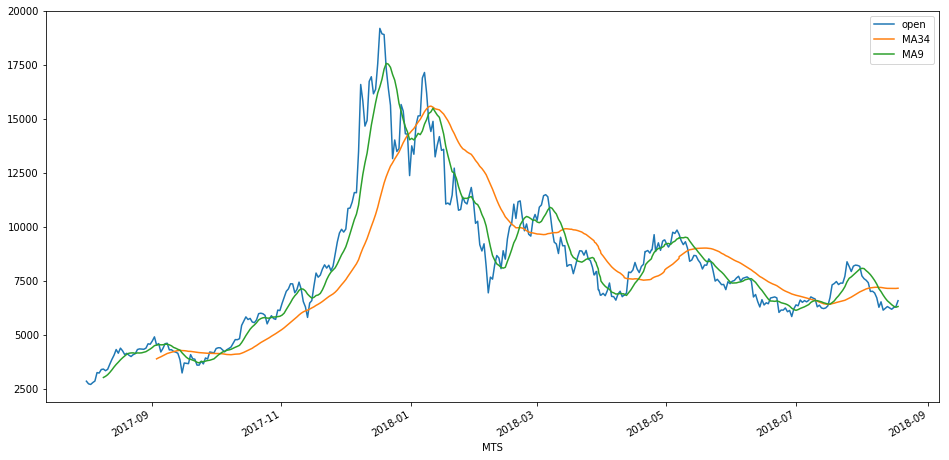

In [21]:
btc['MA9'] = btc['open'].rolling(9).mean()
btc['MA34'] = btc['open'].rolling(34).mean()
btc[['open','MA34','MA9']].plot(figsize=(16,8),label='Btc');

In [24]:
from pandas.plotting import scatter_matrix
altcoins = pd.concat([btc['open'],eos['open'],eth['open'],neo['open'],xrp['open']],axis=1)
altcoins.columns = ['Btc Open','Eos Open','Eth open','Neo Open','Xrp Open']

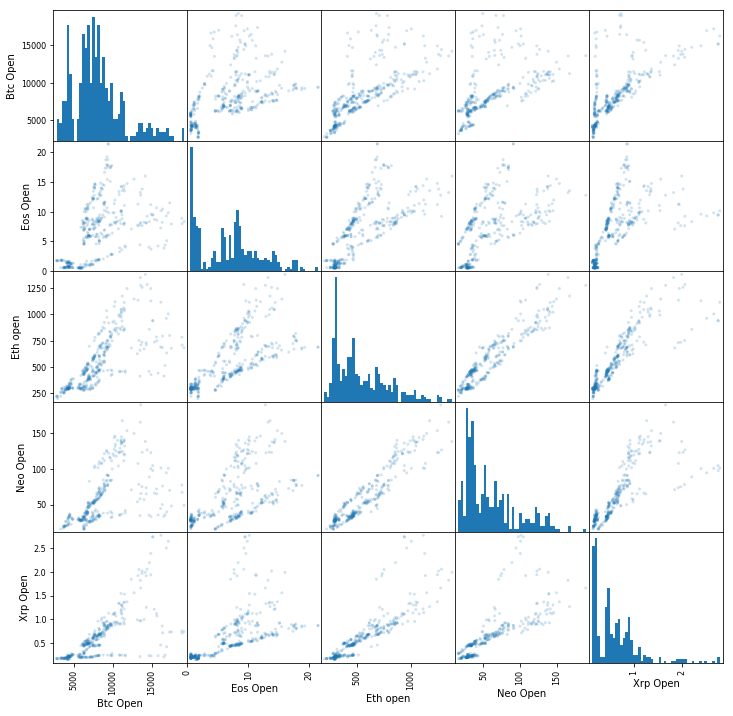

In [25]:
scatter_matrix(altcoins,figsize=(12,12),alpha=0.2,hist_kwds={'bins':50});